In [25]:
from astropy import units as u
from astropy import time

import numpy as np

from poliastro import iod
from poliastro.bodies import Earth, Mars, Sun
from poliastro.ephem import Ephem
from poliastro.maneuver import Maneuver
from poliastro.twobody import Orbit
from poliastro.util import time_range

In [26]:
# https://docs.poliastro.space/en/latest/autoapi/poliastro/twobody/orbit/index.html
circularorbit = Orbit.circular(Earth, 6793137 * u.meter, 0*u.deg, 0*u.deg, 0*u.deg)#, time.Time("2006-01-19", scale='utc'))

In [27]:
print(circularorbit)
coord = circularorbit.sample(1000)
print(type(coord))
print(coord[0])
print(coord[0].x + 1*u.km)
print(coord[0].y)
print(coord[0].z)

13171 x 13171 km x 0.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)
<class 'astropy.coordinates.representation.CartesianRepresentation'>
(13171.2736, 0., 0.) km
13172.2736 km
0.0 km
0.0 km


In [28]:
from poliastro.plotting import OrbitPlotter3D
plotter = OrbitPlotter3D()
plotter.set_attractor(Earth)
plotter.plot(circularorbit)
plotter.set_view(30 * u.deg, 260 * u.deg, distance=3 * u.km)

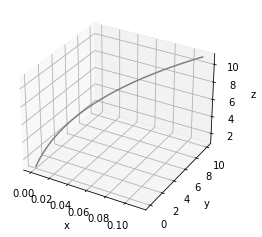

In [29]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
get_ipython().run_line_magic('matplotlib', 'inline')
from scipy.integrate import odeint

miu = 3.986*10**14
a = 6793137
n = np.sqrt(miu/(a**3))

# Define a function which calculates the derivative
def dU_dx(U, x):
    return [U[1],   3*(n**2)*U[0]+2*n*U[3],   U[3],   -2*n*U[1],     U[5],      -(n**2)*U[4]]

U0 = [0,0,0,1,1,1]
xs = np.linspace(0,10,1000)

Us = odeint(dU_dx, U0, xs)
xval = Us[:,0] #first column x-coordinates
yval = Us[:,2]
zval = Us[:,4]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')  
ax.set_aspect('auto')
ax.plot3D(xval,yval,zval, 'grey')


(1000,)
(1000,)


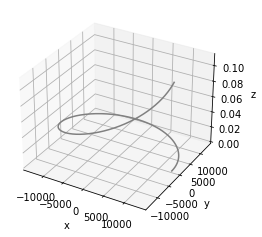

In [37]:
# print(xval.shape)
# print(coord.shape)
# newx = xval*u.km + coord.x
# newy = xval*u.km + coord.y
# newz = xval*u.km + coord.z
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')  
# ax.set_aspect('auto')
# ax.plot3D(newx,newy,newz, 'grey')